In [78]:
from astrocut import fits_cut
from astropy import units as u
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.visualization import simple_norm, SqrtStretch, SinhStretch, LogStretch
from astropy.table import Table
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import os

In [2]:
#首先我们打开文章作者提供的catalog
muse_cata_fits = fits.open("./catalog_muse.dat.fits")
muse_cata_fits.info()

Filename: ./catalog_muse.dat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     114   ()      
  1  muse.dat      1 TableHDU        69   78R x 9C   [I2, F12.8, F12.8, F6.4, I1, I1, F6.3, F7.3, F7.3]   


In [3]:
#显示catalog为表格的形式，
member_catalog = muse_cata_fits[1].data
Table(member_catalog)

ID,RAdeg,DEdeg,z,qf,mult,Ampli,e_Ampli,E_Ampli
int16,float64,float64,float64,int16,int16,float64,float64,float64
1,110.8284294,-73.4602574,0.0,4,1,1.0,0.0,0.0
2,110.8479302,-73.4616212,0.0,4,1,1.0,0.0,0.0
3,110.8334991,-73.4484003,0.0,4,1,1.0,0.0,0.0
4,110.8080566,-73.4466289,0.0,4,1,1.0,0.0,0.0
5,110.8075712,-73.4469594,0.0,4,1,1.0,0.0,0.0
6,110.8261351,-73.4486167,0.0,4,1,1.0,0.0,0.0
7,110.8235839,-73.4499063,0.0,4,1,1.0,0.0,0.0
8,110.8235958,-73.4474173,0.0,4,1,1.0,0.0,0.0
9,110.806675,-73.4516338,0.0,4,1,1.0,0.0,0.0


In [4]:
header = muse_cata_fits[1].header
header

XTENSION= 'TABLE   '           / Ascii Table Extension                          
BITPIX  =                    8 / Character data                                 
NAXIS   =                    2 / Simple 2-D matrix                              
NAXIS1  =                   62 / Number of bytes per record                     
NAXIS2  =                   78 / Number of records                              
PCOUNT  =                    0 / Get rid of random parameters                   
GCOUNT  =                    1 / Only one group (isn't it obvious?)             
TFIELDS =                    9 / Number of data fields (columns)                
EQUINOX =                2000. / Equinox of coordinates (J system)              
EXTNAME = 'muse.dat'           / MUSE redshift catalogue (table A1)             
TBCOL1  =                    1 / ============== Start column +0                 
TFORM1  = 'I2      '           / Fortran Format                                 
TDISP1  = 'I2      '        

In [5]:
#总共成员星系有26个，并不是23个，qf=3说明是比较好的测量结果
for i in range(0, 78):
    if member_catalog.Ampli[i] == 1.0 and member_catalog.z[i] != 0:
        print(i, "id = ",member_catalog.ID[i], "|", "ra = ", member_catalog.RAdeg[i],"de = ", member_catalog.DEdeg[i], "qf = ", member_catalog.qf[i]);

20 id =  21 | ra =  110.8495683 de =  -73.4625124 qf =  3
21 id =  22 | ra =  110.8362871 de =  -73.4568771 qf =  3
22 id =  23 | ra =  110.8252476 de =  -73.4545586 qf =  3
23 id =  24 | ra =  110.8243781 de =  -73.459905 qf =  3
24 id =  25 | ra =  110.8557313 de =  -73.4557427 qf =  3
25 id =  26 | ra =  110.8530957 de =  -73.4566588 qf =  3
26 id =  27 | ra =  110.8161206 de =  -73.4511937 qf =  3
27 id =  28 | ra =  110.8456507 de =  -73.4513365 qf =  3
28 id =  29 | ra =  110.8538419 de =  -73.450063 qf =  3
29 id =  30 | ra =  110.8185163 de =  -73.4552171 qf =  3
30 id =  31 | ra =  110.8045012 de =  -73.4561504 qf =  3
31 id =  32 | ra =  110.8550113 de =  -73.4501908 qf =  3
32 id =  33 | ra =  110.8377986 de =  -73.4536001 qf =  3
33 id =  34 | ra =  110.8326866 de =  -73.4569116 qf =  3
34 id =  35 | ra =  110.8562438 de =  -73.4506971 qf =  2
35 id =  36 | ra =  110.8257093 de =  -73.4586938 qf =  3
36 id =  37 | ra =  110.8376015 de =  -73.4561834 qf =  3
37 id =  38 | ra

Filename: ./image_raw/smacs0723-grizli-v4.0-f090w-clear_drc_sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     123   (24000, 24000)   float32   


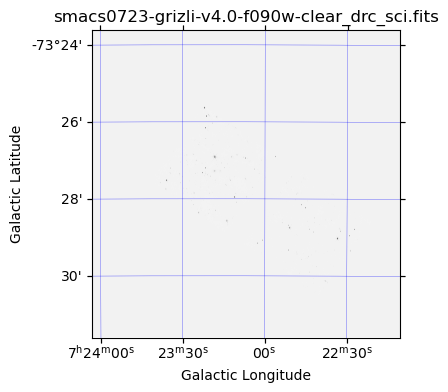

In [6]:
#打开图像文件，并且呈现出来
f090w_fits = fits.open("./image_raw/smacs0723-grizli-v4.0-f090w-clear_drc_sci.fits")
f090w_fits.info()
f090w_image = f090w_fits[0].data
f090w_norm = simple_norm(f090w_image, stretch = 'log')

wcs = WCS(f090w_fits[0])

plt.figure(figsize = (4, 4))
plt.subplot(projection = wcs)
plt.imshow(f090w_image, cmap = 'Greys', norm = f090w_norm, origin = 'lower')
plt.title("smacs0723-grizli-v4.0-f090w-clear_drc_sci.fits")
plt.grid(color = 'blue', ls = 'solid', lw = 0.2)
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')

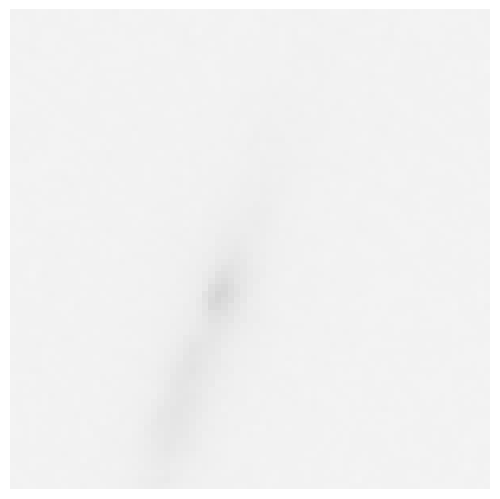

In [69]:
position = SkyCoord(member_catalog.RAdeg[70]*u.deg, member_catalog.DEdeg[70]*u.deg, frame = 'fk5')
size = u.Quantity((1.5, 1.5), u.arcsec)
cutout = Cutout2D(f090w_image, position, size, wcs = wcs)

plt.subplot(projection = wcs)
plt.imshow(cutout.data, cmap = 'Greys', norm = f090w_norm, origin = 'lower')

#标题与轴标，稀释掉以输出无边框的图像
#plt.title("cutout")
#plt.grid(color = 'blue', ls = 'dashed', lw = 0.2)
#plt.xlabel('ra')
#plt.ylabel('de')

#去掉x轴（仅仅是不显示，但是还是要把这一项turn on）
plt.xticks([])
#去掉y轴（仅仅是不显示，但是还是要把这一项turn on）
plt.yticks([])
#去掉坐标轴（仅仅是不显示，但是还是要把这一项turn on）
plt.axis('off')
#为了输出透明图像，还要把坐标轴的locator参数给设置为null
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig('./example.png', pad_inches = 0, bbox_inches = 'tight', dpi = 200)

ID_21_f090w
ID = 21, ra = 110.8495683, de = -73.4625124, z = 0.3217
./image_cutout/f090w/id_21_f090w.png
ID_22_f090w
ID = 22, ra = 110.8362871, de = -73.4568771, z = 0.3241
./image_cutout/f090w/id_22_f090w.png
ID_23_f090w
ID = 23, ra = 110.8252476, de = -73.4545586, z = 0.3774
./image_cutout/f090w/id_23_f090w.png
ID_24_f090w
ID = 24, ra = 110.8243781, de = -73.459905, z = 0.3806
./image_cutout/f090w/id_24_f090w.png
ID_25_f090w
ID = 25, ra = 110.8557313, de = -73.4557427, z = 0.3822
./image_cutout/f090w/id_25_f090w.png
ID_26_f090w
ID = 26, ra = 110.8530957, de = -73.4566588, z = 0.3836
./image_cutout/f090w/id_26_f090w.png
ID_27_f090w
ID = 27, ra = 110.8161206, de = -73.4511937, z = 0.3844
./image_cutout/f090w/id_27_f090w.png
ID_28_f090w
ID = 28, ra = 110.8456507, de = -73.4513365, z = 0.3847
./image_cutout/f090w/id_28_f090w.png
ID_29_f090w
ID = 29, ra = 110.8538419, de = -73.450063, z = 0.3848
./image_cutout/f090w/id_29_f090w.png
ID_30_f090w
ID = 30, ra = 110.8185163, de = -73.4552171, 

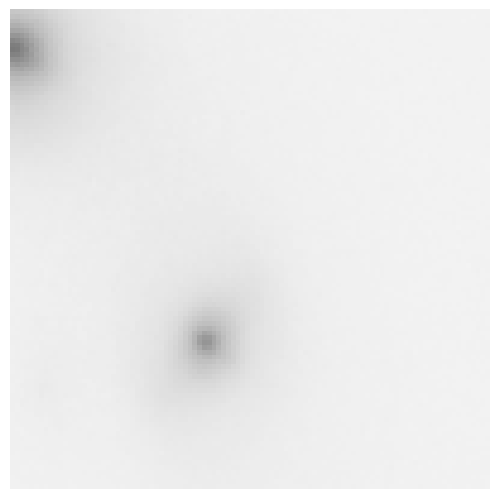

In [50]:
for i in range(0, 78):
    if member_catalog.Ampli[i] == 1.0 and member_catalog.z[i] != 0:
        position = SkyCoord(member_catalog.RAdeg[i]*u.deg, member_catalog.DEdeg[i]*u.deg, frame = 'fk5')
        size = u.Quantity((2, 2), u.arcsec)
        cutout = Cutout2D(f090w_image, position, size, wcs = wcs)
        cutout_name = 'ID = {ID}, ra = {RA}, de = {DE}, z = {Z}'\
        .format(ID = member_catalog.ID[i], RA = member_catalog.RAdeg[i], DE = member_catalog.DEdeg[i], Z = member_catalog.z[i])
        cutout_file_name = 'ID_{ID}_f090w'\
        .format(ID = member_catalog.ID[i])
        cutout_file_path = './image_cutout/f090w/id_{ID}_f090w.png'\
        .format(ID = member_catalog.ID[i])
        print(cutout_file_name)
        print(cutout_name)
        print(cutout_file_path)
        plt.subplot(projection = wcs)
        plt.imshow(cutout.data, cmap = 'Greys', norm = f090w_norm, origin = 'lower')
        
        #去掉坐标轴以及轴标、图标题
        #plt.title(cutout_name)
        #plt.grid(color = 'blue', ls = 'dashed', lw = 0.2)
        #plt.xlabel('ra')
        #plt.ylabel('de')
        #去掉x轴（仅仅是不显示，但是还是要把这一项turn on）
        plt.xticks([])
        #去掉y轴（仅仅是不显示，但是还是要把这一项turn on）
        plt.yticks([])
        #去掉坐标轴（仅仅是不显示，但是还是要把这一项turn on）
        plt.axis('off')
        #为了输出透明图像，还要把坐标轴的locator参数给设置为null
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
        plt.margins(0,0)
        plt.savefig("./image_cutout/f090w/id_{ID}_f090w.png".format(ID = member_catalog.ID[i]), dpi = 400, pad_inches = 0, bbox_inches = 'tight', )

In [ ]:
#下面开始把filtername全部导入进去，总共是19个filters，index的范围为[0,18]

In [66]:
filter_name = ("f105w", "f115wn", "f125w", "f140w", "f150w-clear", 
               "f160w", "f200w-clear", "f200wn", "f277w", 
               "f356w", "f435w", "f444w-clear", "f606w", 
               "f770w", "f814w", "f1000w", "f1500w", "f1800w", "ir")

In [77]:
filter_name[18]

'ir'